<a href="https://colab.research.google.com/github/bassamadnan/deep-learning-dog-breed-classification/blob/main/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐕‍🦺 End-to-end Multi-class Dog Breed Classification

> Indented block

> Indented block




This notebook  builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.
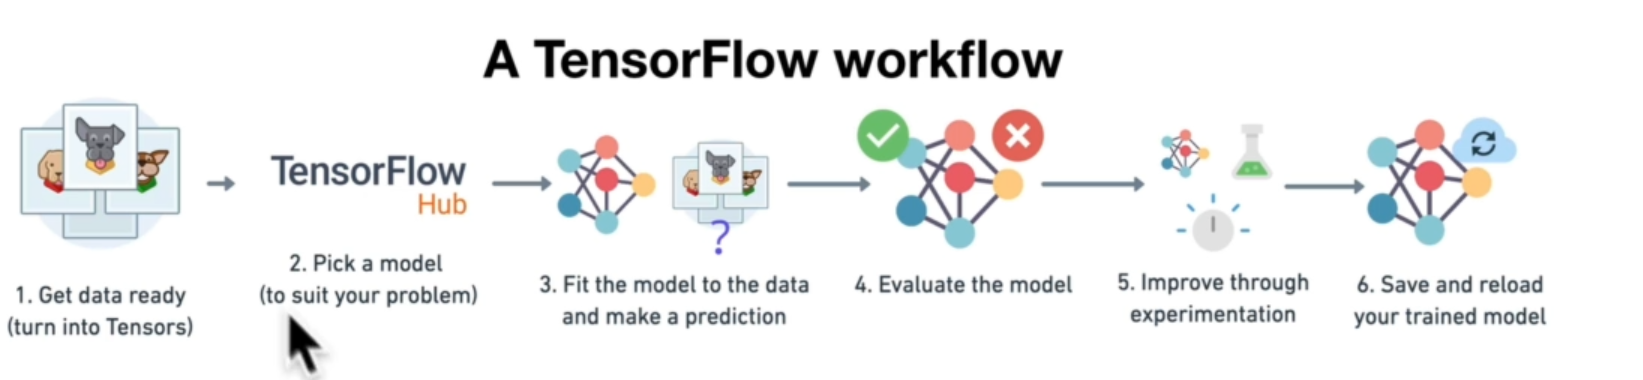

## 1. Problem
> Identifying the breed of a dog given an image of a dog.

## 2. Data
The data we are using is from Kaggle's dog breed identification competition.
https://www.kaggle.com/competitions/dog-breed-identification/overview

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use Deep Learning/ Transfer Learning
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are 10,000+ images in the training set (labelled)
* There are around 10,000 images in the test set (unlabelled and to be predicted)

In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

In [35]:
# Unzip the data 
# !unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

## Get our workspace ready

In [36]:
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__) 
print("TF Hub: ", hub.__version__)

# Check for GPU availability
print("GPU", "available ✅" if tf.config.list_physical_devices("GPU") else ":(")

TF version:  2.8.2
TF Hub:  0.12.0
GPU available ✅


## Getting our data ready (Turning our images into Tensors).

Our data must be in numerical format, these numerical representations are called tensors.


In [37]:
import pandas as pd 
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


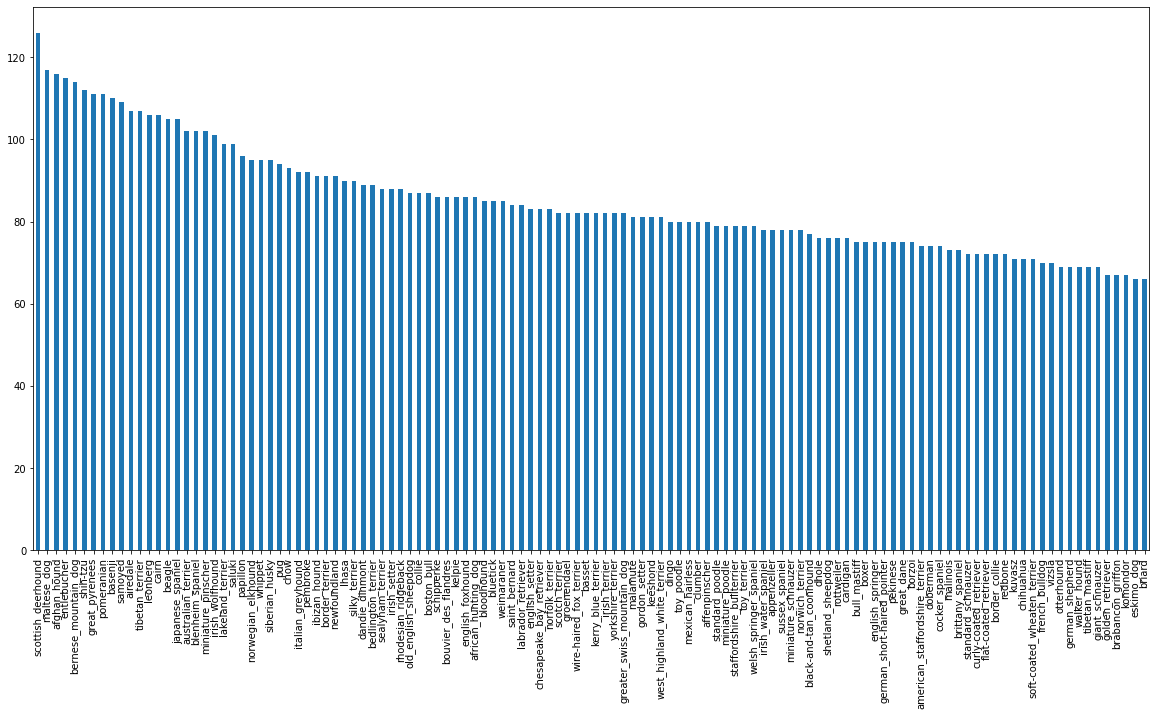

In [38]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [39]:
labels_csv["breed"].value_counts().median()

82.0

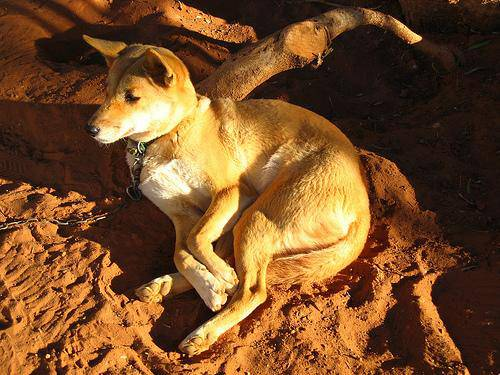

In [40]:
# Viewing an image 
from IPython.display import Image 
Image("/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

In [41]:
filenames = ["/content/drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [42]:
# Check whether number of files matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog Vision/train")) == len(filenames):
  print("Pass:", len(filenames))
else:
  print("Fail")

Pass: 10222


tibetan_mastiff


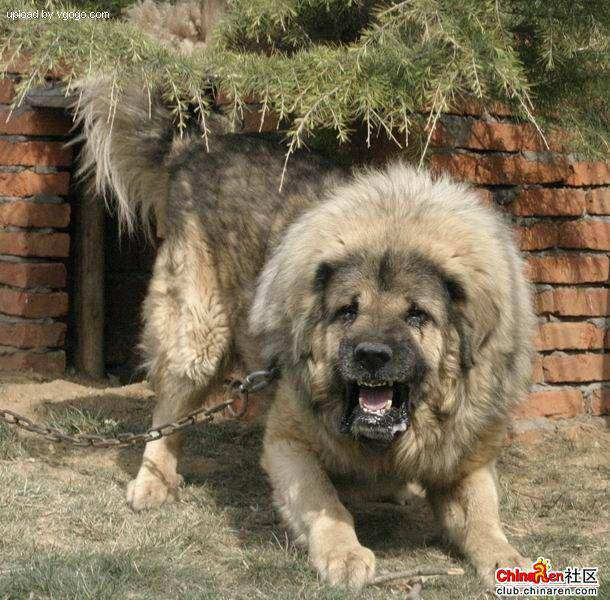

In [43]:
print(labels_csv["breed"][9000])
Image(filenames[9000])

In [44]:
# Prepare labels
labels = labels_csv["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [45]:
import numpy as np
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [46]:
if len(labels) == len(filenames):
  print("Match")
else:
  print("False")

Match


In [47]:
unique_breeds = np.unique(labels)
len(unique_breeds), unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [48]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [49]:
# Turn every label into a boolean array 
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [50]:
len(boolean_labels)

10222

In [51]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # Single 1 where the bool value equals True

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating a validation set
Since a validation set isn't provided in this kaggle notebook, we shall create our own.

In [52]:
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase it as needed.

In [53]:
# Set number of images to use for Experimenting 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [54]:
# OP

In [55]:
from sklearn.model_selection import train_test_split
# Split the into training and validation set of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [56]:
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

## Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input (as images are large)
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (jpg) into Tensors
4. Normalize our `image` 
4. Resize `image` to be a shape of (224, 224)
5. Return the modified `image`

In [57]:
# Define image size, alot of ML is lining up the size/shape of input with the model we are using hehe
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Take an img file path and turn it into a Tensor
  """
  # Read an img file (Load Images from tf doc)
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0 to 255 to 0 to 1 values (nomralisation)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value 
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [58]:
tensor = tf.io.read_file(filenames[26])
# tensor
# # Converted the file into this string

In [59]:
tensor = tf.image.decode_jpeg(tensor, channels=3)[:2]
tensor

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]]], dtype=uint8)>

In [60]:
tf.image.convert_image_dtype(tensor, tf.float32)[:2] # Makes computing more efficient

<tf.Tensor: shape=(2, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]]], dtype=float32)>

In [61]:
# Importing an image
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [62]:
image.max(), image.min()

(255, 0)

In [63]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [64]:
tf.constant(image)[:2]
# Now its in a tensor

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [65]:
# Research Yaan Lecunn, Jeremy Howard
# https://twitter.com/ylecun/status/989610208497360896?s=20

# Turning our data into batches
Why turn our data into batches? 
When we process 10k+ images in one go, they all might not fit into memory.
https://twitter.com/ylecun/status/989610208497360896?s=20

GPU's already have fast computing power, it still has a limited ammount of memory. So we do about 32 at a time (reffer tweet).
In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`

In [66]:
# Create a simple function to return a tuple of Tensors (image, label)
def get_image_label(image_path, label):
  """
  Takes the image file path name,  and the associated label
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [67]:
# process_image(X[42], y[42])

In [68]:
process_image(X[42], tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Lets make a function to turn all of our data (`x` & `y`) into these batches. 

In [69]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32
# Create a function to turn our data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE,valid_data= False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if its training data but doesn't shuffle if its validation data.
  Also accepts test data as input (no labels). This is why y=None by default
  """
  # If the data is a test dataset, we do not have labels
  if test_data:
    print("Creating test data batches...")
    # Only filepaths, no labels
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Pass it some tensors, it will create a dataset out of that
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors 
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffle paths and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tupples, this also turns the image path into a preprocessed image
    data = data.map(get_image_label) 
    data_batch = data.batch(BATCH_SIZE)
    return data_batch
  

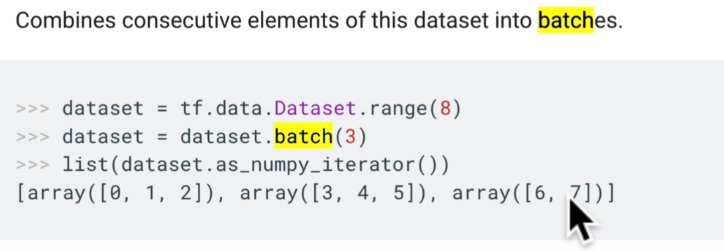

In [70]:
# Create train and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches..


In [71]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [72]:
# Here None is batch size, even though we have set it to 32, it stays None as batch size is flexible

In [73]:
# Visualising data batches
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  for i in range(25):
    # Create subplots
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off") #

In [74]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

In [75]:
type(train_images)

numpy.ndarray

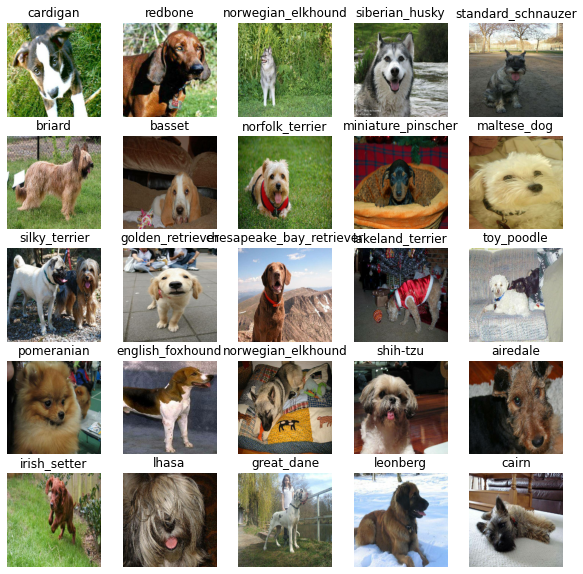

In [76]:
show_25_images(train_images, train_labels)

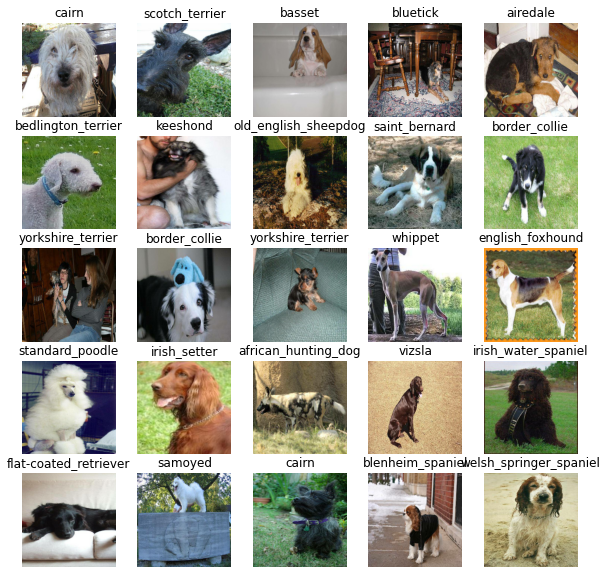

In [77]:
# Visualize validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there are a few things we need to define:
* Input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in form of Tensors) of our model.  
* The URL of the model we want to use (sometimes may be built by scratch).
Here, we will be using 
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [78]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels
# Setup the output shape
OUTPUT_SHAPE = len(unique_breeds)
# Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

# Tensorflow Keras
Keras is a high-level API for building and training DL models.
https://www.tensorflow.org/guide/keras/sequential_model
Q: Difference between sequential and functional API?
Putting together our inputs, outputs and model in the Keras deep learning model.

Knowing this, create a function which:
* Takes the input shape, output shape, and model (we've) chosen as parameters.
* Defines the layers in a Keras model in sequential fashion.
* Compiles the model (says it should be evaluated and improved)
* Builds the model (tells the model the input it'll be getting)
* Returns the model

In [79]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup model layers
  model = tf.keras.Sequential([ 
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [80]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions that a model can use to during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long,

## TensorBoard Callback
To setup a TensorBoard callback, we need to do three things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to our directory and pass it to our models `fit()` function.
3. Visualize our models training logs with `%tensorboard` magic function (after model training).

In [81]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [82]:
import datetime 
# Create a function to build TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping CallBack
Early stopping helps our model from overfitting by stopping training if certain evaluation metrics stops improving (overfitting/not able to generalize/ learns too well (mug-up))

In [83]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on a subset of data)
We have chosen 100 images, just to make sure everything is working.
Epochs = Chances our model was given to learn the dataset.

In [84]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}  

Creating a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_ballback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (above cell) and the callbacks.
* Return the model

In [85]:
# Build a function to train and return a trained model 
def train_model():
  """
  Trains a given model and returns a trained version.
  """
  # Create a model 
  model = create_model()

  # Create new TensorBoard session everytime we train a model 
  tensorboard = create_tensorboard_callback() # Which expt did better than another
  # Fit the model to the data passing it the callbacks we created 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # Once a epoch
            callbacks=[tensorboard, early_stopping])
  # Return the model
  return model

In [87]:
# # Fit the model to the data
# model = train_model()